In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import expsolve as es
import expsolve.discretize.tensorgrid as ex
import expsolve.evolve.splittings.classical as split

import torch
from torch import exp, sin, abs, real, pi, diag, imag
from torch.linalg import matrix_exp

from IPython.display import display, Markdown

c:\ProgramData\Anaconda3\envs\torchcomplex\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n = 200
L = 10
xr = [-L, L]
x = ex.grid1d(n, xr)

x0 = -2.0
u = exp(-(x-x0)**2/(2*0.25))
u = ex.normalize(u, xr)

V0 = x**4 - 10*x**2

sigma = 0.5
c1 = 5.
c2 = 5.
x0 = -2
Vt = lambda t : c1 * exp(-(x-(x0+t))**2/(2*sigma)) * sin(8*pi*(x-t)) - c2 * sin(5*pi*t) * x

nu = 10.
Vnl = lambda u: nu*abs(u)**2

V = lambda u, t: V0  + Vt(t) + Vnl(u)

eLu = lambda t, h, c, u: ex.diffopexp(0, 2, 1j*c*h, u, xr)
eVu = lambda t, h, c, u: exp(-1j*c*h*V(u, t))*u    
strangalpha, strangbeta = split.symmetric([],[])
strangstep = lambda t, h, u0: split.stepper(t, h, u0, eVu, eLu, strangalpha, strangbeta)

trange = [0, 1]
timegrid = es.timegrid(trange, ndt=1000)

In [3]:

uT, obsvalues, uintermediate = es.solvediffeq(u, timegrid, strangstep, observables = {'position': lambda u: ex.observable(lambda psi: x*psi, u, xr)}, storeintermediate = True)

In [4]:
lines = lambda frame: [((x, (V0+Vt(timegrid[frame]))/100), {'color':mcolors.CSS4_COLORS['steelblue']}, 'V'), 
                       ((x, imag(uintermediate[frame])), {'color':mcolors.CSS4_COLORS['gold']}, '|u|'),
                       ((x, real(uintermediate[frame])), {'color':mcolors.CSS4_COLORS['yellowgreen']}, 'Re(u)'),
                       ((x, abs(uintermediate[frame])), {'color':mcolors.CSS4_COLORS['darkorange']}, 'Im(u)')]

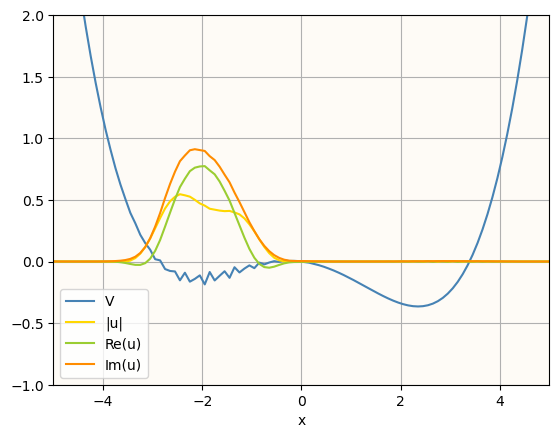

In [5]:
fig, ax = plt.subplots()
ex.plotlines(ax, linespecs=lines(100), xlim=[-5,5], ylim=[-1,2], xlabel='x')
plt.show()

In [6]:
drawframe = lambda ax, frame: ex.plotlines(ax, linespecs=lines(frame), xlim=[-5,5], ylim=[-1,2])
outputgif = 'nonlinear_borderless.gif'
es.animate(drawframe, len(uintermediate), outputgif, speedfactor=5, border=False)
display(Markdown(f'![gif]({outputgif})'))

![gif](nonlinear_borderless.gif)

In [7]:
drawframe = lambda ax, frame: ex.plotlines(ax, linespecs=lines(frame), xlim=[-5,5], ylim=[-1,2], xlabel='x')
outputgif = 'nonlinear_bordered.gif'
es.animate(drawframe, len(uintermediate), outputgif, speedfactor=5, border=True)
display(Markdown(f'![gif]({outputgif})'))

![gif](nonlinear_bordered.gif)

In [8]:
drawframe = lambda ax, frame: ex.plotlines(ax, linespecs=lines(frame), xlim=[-5,5], ylim=[-1,2], bgcolor=mcolors.CSS4_COLORS['darkslategray'])
outputgif = 'nonlinear_bordered_dark.gif'
es.animate(drawframe, len(uintermediate), outputgif, speedfactor=5, border=True)
display(Markdown(f'![gif]({outputgif})'))

![gif](nonlinear_bordered_dark.gif)

In [9]:
drawframe = lambda ax, frame: ex.plotlines(ax, linespecs=lines(frame), xlim=[-5,5], ylim=[-1,2], bgcolor=mcolors.CSS4_COLORS['black'], grid=False, legend=False)
outputgif = 'nonlinear_borderless_black.gif'
es.animate(drawframe, len(uintermediate), outputgif, speedfactor=5, border=False)
display(Markdown(f'![gif]({outputgif})'))

![gif](nonlinear_borderless_black.gif)